In [2]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread
from skimage.transform import resize, rescale

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
# The image module supports basic image loading, rescaling and display operations.
import matplotlib.image as mping

In [4]:
# 1. Preprocess dataset
vessel = []
filenames = []

dir_path = "/Users/feiwu/fw/VRES/project/image/test_images/vessel/"

for file in os.listdir(dir_path):
    # print(file)
    filenames.append(file)
    image = mping.imread(os.path.join(dir_path, file))
    vessel.append(image)
print(str(len(vessel)) + " files in total.")

45 files in total.


In [5]:
vessel[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

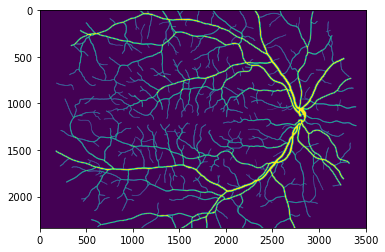

In [84]:
plt.imshow(vessel[1])

In [7]:
# target

target = []
for i in filenames:
    if 'h' in i:  # healthy
        class_type = 1
        target.append(class_type)
    else:         # unhealthy
        class_type = 0 
        target.append(class_type)
print(target)

[1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]


(350, 302)


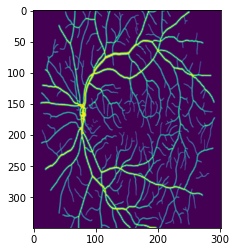

In [8]:
# 2. rescale images
resized_images = []
flat_data = []

for img in vessel:
    # rescale
    #resized_img = rescale(img, 0.1, anti_aliasing=False)
    
    # resize => 350x302
    resized_img = resize(img, (350, 302))
    resized_images.append(resized_img)
    
    # flatten 
    flat_data.append(resized_img.flatten())

plt.imshow(resized_images[0])
print(resized_images[0].shape)

In [9]:
# convert list to numpy array 
flat_data = np.array(flat_data)
resized_images = np.array(resized_images)

In [10]:
# 3. create dataframe
df = pd.DataFrame(flat_data)
df['Target'] = target
df

,0,1,2,3,4,5,6,7,8,9,...,105691,105692,105693,105694,105695,105696,105697,105698,105699,Target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [73]:
# 4. split dataset
# random state
rs = 100

# split the data
y = df['Target']
X = df.drop(['Target'], axis=1)
X_mat = X.values
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.4, stratify=y, random_state=rs)     

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

In [48]:
# 5. build and test model
from sklearn.neural_network import MLPClassifier

In [49]:
import warnings
warnings.filterwarnings("ignore")

In [74]:
# 5.1 MLPClassifier - default version
model = MLPClassifier(random_state=rs)
model.fit(X_train, y_train)
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(model)

Train accuracy: 1.0
Test accuracy: 0.7777777777777778
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.62      0.83      0.71         6

    accuracy                           0.78        18
   macro avg       0.76      0.79      0.77        18
weighted avg       0.81      0.78      0.78        18

MLPClassifier(random_state=100)


In [16]:
# get input features from training set
print(X_train.shape)

(22, 105700)


In [75]:
# 5.2 Change hidden_layer_sizes
# WILL CRASH IF HIDDEN LAYER SIZE IS TOO BIG

params = {'hidden_layer_sizes': [(x,) for x in range(5, 50, 5)]}

cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=None)
cv.fit(X_train, y_train)
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))
print(cv.best_params_)

Train accuracy: 1.0
Test accuracy: 0.7777777777777778
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.67      0.67      0.67         6

    accuracy                           0.78        18
   macro avg       0.75      0.75      0.75        18
weighted avg       0.78      0.78      0.78        18

{'hidden_layer_sizes': (15,)}


In [76]:
params = {'hidden_layer_sizes': [(x,) for x in range(35, 100, 5)]}

cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=None)
cv.fit(X_train, y_train)
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))
print(cv.best_params_)

Train accuracy: 1.0
Test accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.69      0.92      0.79        12
           1       0.50      0.17      0.25         6

    accuracy                           0.67        18
   macro avg       0.59      0.54      0.52        18
weighted avg       0.62      0.67      0.61        18

{'hidden_layer_sizes': (60,)}


In [77]:
params = {'hidden_layer_sizes': [(x,) for x in range(30, 100, 10)]}

cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=None)
cv.fit(X_train, y_train)
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))
print(cv.best_params_)

Train accuracy: 1.0
Test accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.69      0.92      0.79        12
           1       0.50      0.17      0.25         6

    accuracy                           0.67        18
   macro avg       0.59      0.54      0.52        18
weighted avg       0.62      0.67      0.61        18

{'hidden_layer_sizes': (60,)}


In [78]:
params = {'hidden_layer_sizes': [(25,), (30,), (35,), (40,)]}

cv = GridSearchCV(param_grid = params, estimator = MLPClassifier(random_state = rs), cv=10, n_jobs = None)
cv.fit(X_train, y_train)
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))
print(model)
print(cv.best_params_)

Train accuracy: 1.0
Test accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        12
           1       0.00      0.00      0.00         6

    accuracy                           0.67        18
   macro avg       0.33      0.50      0.40        18
weighted avg       0.44      0.67      0.53        18

MLPClassifier(random_state=100)
{'hidden_layer_sizes': (25,)}


In [79]:
params = {'hidden_layer_sizes': [(25,), (30,), (35,), (40,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}
cv = GridSearchCV(param_grid = params, estimator = MLPClassifier(random_state = rs), cv=10, n_jobs = None)
cv.fit(X_train, y_train)
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))
print(cv.best_params_)

Train accuracy: 1.0
Test accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        12
           1       0.00      0.00      0.00         6

    accuracy                           0.67        18
   macro avg       0.33      0.50      0.40        18
weighted avg       0.44      0.67      0.53        18

{'alpha': 0.01, 'hidden_layer_sizes': (25,)}


In [80]:
params = {'hidden_layer_sizes': [(35,), (40,), (45,), (50,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}
cv = GridSearchCV(param_grid = params, estimator = MLPClassifier(random_state = 100), n_jobs = None)
cv.fit(X_train, y_train)
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))
print(cv.best_params_)

Train accuracy: 1.0
Test accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        12
           1       0.00      0.00      0.00         6

    accuracy                           0.67        18
   macro avg       0.33      0.50      0.40        18
weighted avg       0.44      0.67      0.53        18

{'alpha': 0.01, 'hidden_layer_sizes': (40,)}


In [81]:
params = {'hidden_layer_sizes': [(40,), (45,), (50,), (55,)], 'alpha': [0.01]}
cv = GridSearchCV(param_grid = params, estimator = MLPClassifier(random_state = 100), n_jobs = None)
cv.fit(X_train, y_train)
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))
print(cv.best_params_)

Train accuracy: 1.0
Test accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        12
           1       0.00      0.00      0.00         6

    accuracy                           0.67        18
   macro avg       0.33      0.50      0.40        18
weighted avg       0.44      0.67      0.53        18

{'alpha': 0.01, 'hidden_layer_sizes': (40,)}


In [82]:
params = {'hidden_layer_sizes': [(25,), (30,), (35,), (40,)], 'alpha': [0.01]}
cv = GridSearchCV(param_grid = params, estimator = MLPClassifier(random_state = rs), n_jobs = None)
cv.fit(X_train, y_train)
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))
print(cv.best_params_)

Train accuracy: 1.0
Test accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        12
           1       0.00      0.00      0.00         6

    accuracy                           0.67        18
   macro avg       0.33      0.50      0.40        18
weighted avg       0.44      0.67      0.53        18

{'alpha': 0.01, 'hidden_layer_sizes': (25,)}


In [83]:
params = {'hidden_layer_sizes': [(20,), (25,), (30,), (35,)], 'alpha': [0.01]}
cv = GridSearchCV(param_grid = params, estimator = MLPClassifier(random_state = rs), n_jobs = None)
cv.fit(X_train, y_train)
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))
print(cv.best_params_)

Train accuracy: 1.0
Test accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        12
           1       0.00      0.00      0.00         6

    accuracy                           0.67        18
   macro avg       0.33      0.50      0.40        18
weighted avg       0.44      0.67      0.53        18

{'alpha': 0.01, 'hidden_layer_sizes': (25,)}


In [60]:
# randomly change the data list order 
import random
from sklearn.utils import shuffle
df = shuffle(df)
df


,0,1,2,3,4,5,6,7,8,9,...,105691,105692,105693,105694,105695,105696,105697,105698,105699,Target
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
